In [28]:
#importation des librairies necessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
#Traitement préalable

# lecture chargement des data depuis wineQT.csv
data_wine = pd.read_csv("../WineQT.csv")

print("ci dessous le début du tableau")
print(data_wine.head())  # affichage des premières lignes

print()

print("ci dessous la description")
print(data_wine.describe()) # voir les informations et statistiques principales du data

print()

print("ci dessous le décompte des null NaN")
data_wine.isnull().sum() # vérifier et afficher le décompte des données manquantes NaN du dataframe

print()

print("ci dessous le min de quality")
#data_wine['quality'].min()

print()

print("ci dessous le max de quality")
data_wine['quality'].max()

ci dessous le début du tableau
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1  

8

Cluster 1: 224 points
Cluster 2: 537 points
Cluster 3: 186 points
Cluster 4: 196 points


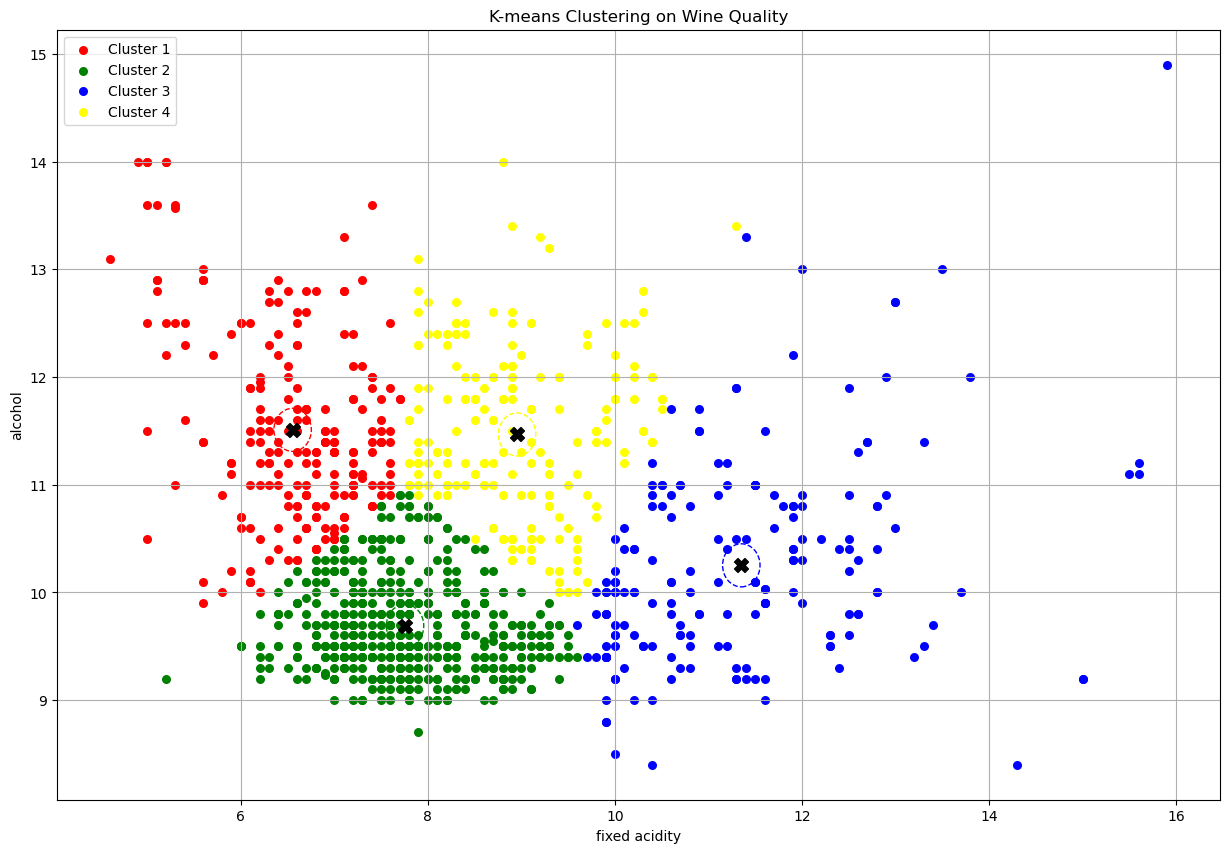

In [3]:

# Sélection des caractéristiques pour le clustering (choix des deux colonnes ciblées)
X = data_wine[['fixed acidity', 'alcohol']].values

#configuration de K means
k = 4  # définition du nombre de clusters (groupes) --> donc cela regroupera les points en 4 clusters en fonction de leur proximité
# K-means clustering
kmeans = KMeans(n_clusters=k) #initialisation de kmeans
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Compter le nombre de points par cluster : on compte combien de points appartiennent a chaque cluster et retourner un dictionnaire indiquant le nombre de points dans chaque cluster
unique, counts = np.unique(clusters, return_counts=True)
point_counts = dict(zip(unique, counts))

# Afficher le nombre de points par cluster
for cluster_id, num_points in point_counts.items():
    print(f"Cluster {cluster_id + 1}: {num_points} points")




# ********************affichage****************************************************
#caractéristiques du graphique
plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue', 'yellow']

# Traçage de chaque cluster
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s=100, color='black', marker='X')  # Centroïde

# Dessiner des cercles autour des clusters
for i in range(k):
    circle = plt.Circle(centroids[i], 0.2, color=colors[i], fill=False, linestyle='dashed')
    plt.gca().add_artist(circle)

plt.title('K-means Clustering on Wine Quality')
plt.xlabel('fixed acidity')
plt.ylabel('alcohol')
plt.legend()
plt.grid()
plt.show()

#retours du professeur intervenant pour pousser le travail : voir en 2 clusters / voir avec le critere qualité / 8 groupes

rappel sur le kmeans : algorithme d'apprentissage non supervisé utilisé pour regrouper (ou "cluster") des données en K groupes distincts
L'objectif est de regrouper des données similaires dans un même cluster 

***********EXPLICATIONS & ANALYSE KMEANS pour les critères fixed acidity et alchool ***********************

Intérêt des critères fixed acidity et alchool :
permet un regroupement des vins sur base des propriétés physico-chimiques qui influencent le style : léger, corsé, acide, doux etc 

Principe : les vins sont regroupés en 4 clusters selon leur acidité fixe et leur taux d'alcool
Chaque cluster regroupe des vins aux caractéristiques similaires
Le graphique permet de visualiser ces groupes et leur position par rapport aux centroïdes

Lecture du K = 4 :

Cluster 1 (rouge) :
Situé dans la partie inférieure gauche du graphique.
Correspond aux vins avec une acidité fixe relativement faible (environ 6 à 8) et un taux d’alcool faible (entre 9 et 11).
Cluster compact, indiquant une certaine homogénéité dans ces caractéristiques.

Cluster 2 (jaune) :
Situé au-dessus et à droite du Cluster 1.
Concerne des vins ayant une acidité légèrement supérieure (environ 7 à 10) et un taux d’alcool moyen (environ 10 à 13).
Les points sont légèrement plus dispersés, ce qui peut indiquer une plus grande variété parmi les vins de ce groupe.

Cluster 3 (vert) :
Juste à droite du Cluster 1, mais avec un chevauchement partiel avec le Cluster 2.
Ces vins ont une acidité fixe modérée (environ 8 à 11) et un taux d’alcool similaire au Cluster 2 (10 à 13).
Le chevauchement avec Cluster 2 montre qu’il peut être difficile de distinguer ces deux groupes.

Cluster 4 (bleu) :
Situé à l’extrême droite, sur la zone des acidités les plus élevées (12 à 16) et un taux d’alcool modéré (10 à 15).
Cluster très dispersé, ce qui indique une grande diversité parmi ces vins.


Chevauchement Cluster 2 (jaune) et Cluster 3 (vert) :
La frontière entre ces deux groupes n'est pas clairement définie. Cela peut indiquer que les caractéristiques "fixed acidity" et "alcohol" ne suffisent pas toujours à bien séparer ces vins.

Dispersions dans le Cluster 4 (bleu) :
Les points sont très éloignés du centroïde, ce qui montre une diversité élevée dans ce groupe. Cela pourrait être dû à des sous-groupes non détectés ou à des variations importantes dans les caractéristiques choisies.
 
Les vins avec une faible acidité et un faible taux d'alcool (Cluster 1) forment un groupe distinct et homogène.
Les vins ayant une acidité élevée (Cluster 4) sont plus variés, ce qui peut indiquer une plus grande diversité dans leurs caractéristiques chimiques ou de production.
Les clusters 2 et 3 montrent qu'il y a une transition progressive entre des acidités et taux d'alcool modérés, rendant leur séparation moins nette.


Conclusion : ces groupes reflètent des caractéristiques similaires dans les données : comme les types de vins ayant une acidité ou un taux d'alcool proches. + visualisation claire

Cluster 1: 303 points
Cluster 2: 840 points


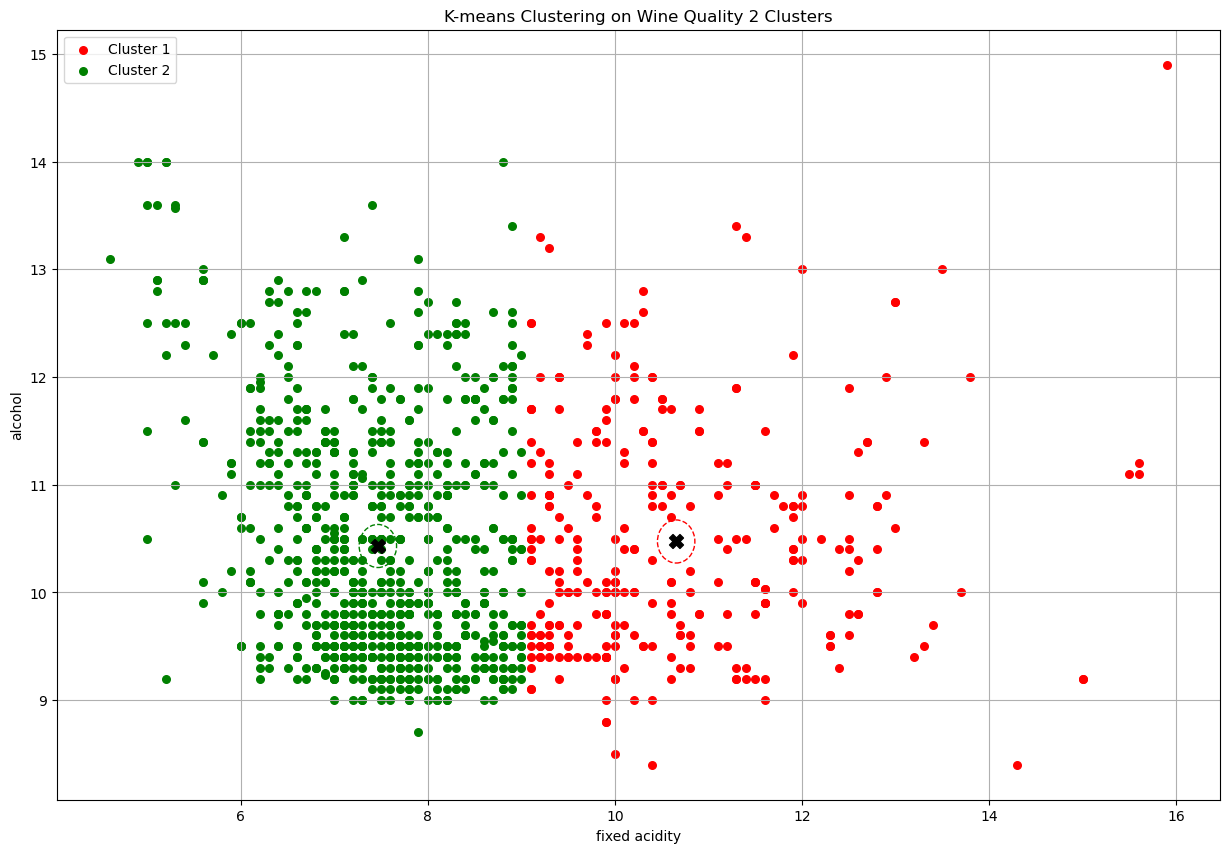

In [5]:
# -------------------- AVEC 2 CLUSTER 2D-------------------
# Sélection des caractéristiques pour le clustering (choix des deux colonnes ciblées)
X = data_wine[['fixed acidity', 'alcohol']].values

#configuration de K means
k = 2  # définition du nombre de clusters (groupes) --> donc cela regroupera les points en 2 clusters en fonction de leur proximité
# K-means clustering
kmeans = KMeans(n_clusters=k) #initialisation de kmeans
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Compter le nombre de points par cluster : on compte combien de points appartiennent a chaque cluster et retourner un dictionnaire indiquant le nombre de points dans chaque cluster
unique, counts = np.unique(clusters, return_counts=True)
point_counts = dict(zip(unique, counts))

# Afficher le nombre de points par cluster
for cluster_id, num_points in point_counts.items():
    print(f"Cluster {cluster_id + 1}: {num_points} points")




# ********************affichage****************************************************
#caractéristiques du graphique
plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue', 'yellow']

# Traçage de chaque cluster
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s=100, color='black', marker='X')  # Centroïde

# Dessiner des cercles autour des clusters
for i in range(k):
    circle = plt.Circle(centroids[i], 0.2, color=colors[i], fill=False, linestyle='dashed')
    plt.gca().add_artist(circle)

plt.title('K-means Clustering on Wine Quality 2 Clusters')
plt.xlabel('fixed acidity')
plt.ylabel('alcohol')
plt.legend()
plt.grid()
plt.show()

#retours du professeur intervenant pour pousser le travail : voir en 2 clusters / voir avec le critere qualité / 8 groupes

Cluster 1: 283 points
Cluster 2: 146 points
Cluster 3: 39 points
Cluster 4: 195 points
Cluster 5: 71 points
Cluster 6: 113 points
Cluster 7: 82 points
Cluster 8: 214 points


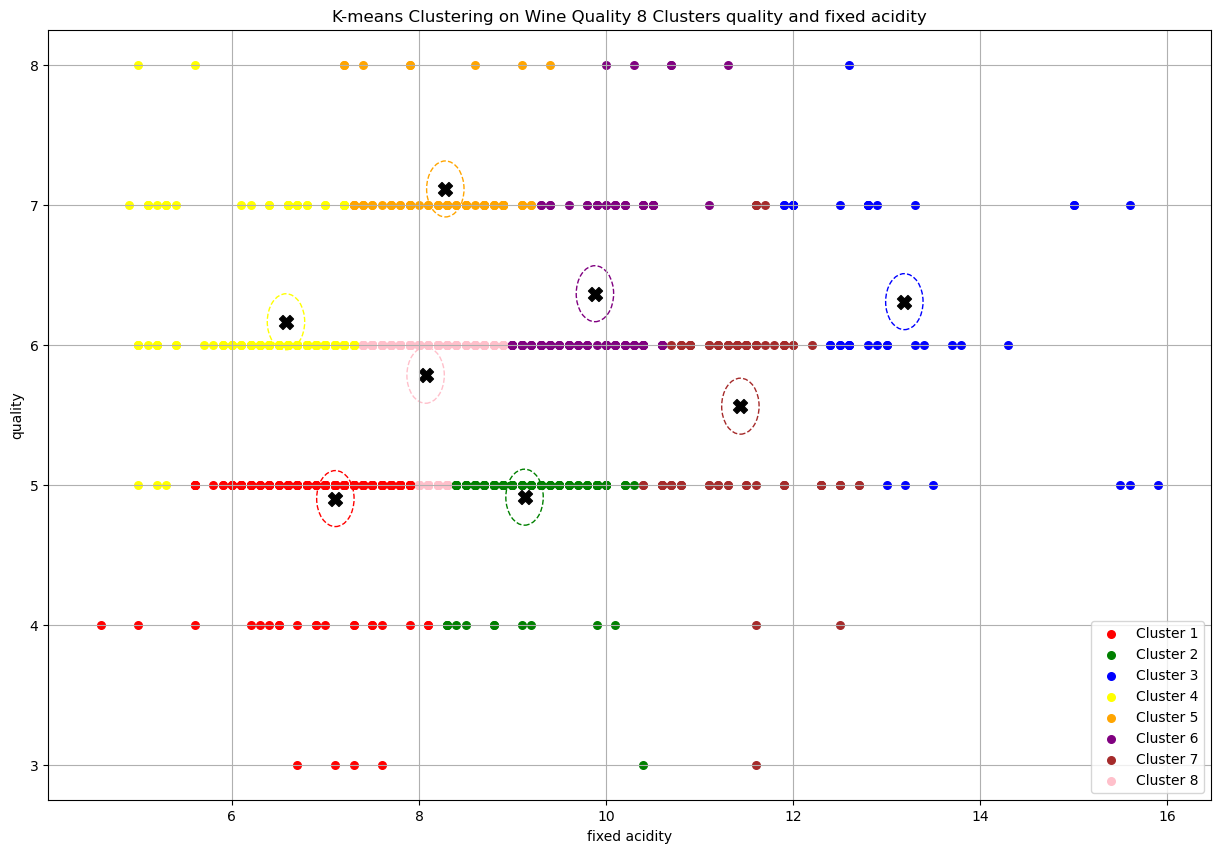

In [17]:
# -------------------- AVEC 8 CLUSTER DE QUALITE 2D-------------------

# Sélection des caractéristiques pour le clustering (choix des deux colonnes ciblées) et standardisation des données
#scaler = StandardScaler()
#X = scaler.fit_transform( data_wine[['fixed acidity', 'quality']].values)
X = data_wine[['fixed acidity', 'quality']].values


#configuration de K means
k = 8  # définition du nombre de clusters (groupes) --> donc cela regroupera les points en 2 clusters en fonction de leur proximité
# K-means clustering
kmeans = KMeans(n_clusters=k) #initialisation de kmeans
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Compter le nombre de points par cluster : on compte combien de points appartiennent a chaque cluster et retourner un dictionnaire indiquant le nombre de points dans chaque cluster
unique, counts = np.unique(clusters, return_counts=True)
point_counts = dict(zip(unique, counts))

# Afficher le nombre de points par cluster
for cluster_id, num_points in point_counts.items():
    print(f"Cluster {cluster_id + 1}: {num_points} points")




# ********************affichage****************************************************
#caractéristiques du graphique
plt.figure(figsize=(15, 10))
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']

# Traçage de chaque cluster
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s=100, color='black', marker='X')  # Centroïde

# Dessiner des cercles autour des clusters
for i in range(k):
    circle = plt.Circle(centroids[i], 0.2, color=colors[i], fill=False, linestyle='dashed')
    plt.gca().add_artist(circle)

plt.title('K-means Clustering on Wine Quality 8 Clusters quality and fixed acidity')
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.legend()
plt.grid()
plt.show()

#retours du professeur intervenant pour pousser le travail : voir en 2 clusters / voir avec le critere qualité / 8 groupes

Remarque la valeur minimale pour la qualité est 3 et la valeur maximale est 8.
Cela est confirmé par les lignes de codes vérifiées plus haut dans le traitement préliminaire: 
data_wine['quality'].min()
et 
data_wine['quality'].max()

Cluster 1: 178 points
Cluster 2: 112 points
Cluster 3: 60 points
Cluster 4: 289 points
Cluster 5: 100 points
Cluster 6: 159 points
Cluster 7: 149 points
Cluster 8: 96 points


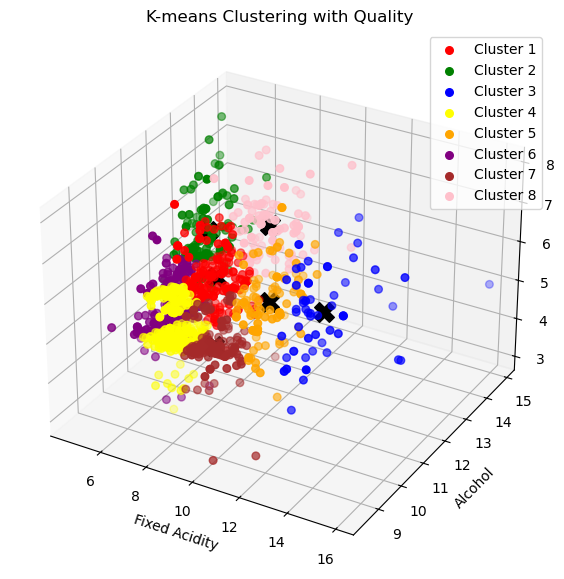

In [27]:
# -------------------- AVEC 8 CLUSTER DE QUALITE 3D-------------------

# Sélection des caractéristiques pour le clustering (choix des deux colonnes ciblées) et standardisation des données
#scaler = StandardScaler()
#X = scaler.fit_transform( data_wine[['fixed acidity', 'quality']].values)
X = data_wine[['fixed acidity', 'alcohol', 'quality']].values


#configuration de K means
k = 8  # définition du nombre de clusters (groupes) --> donc cela regroupera les points en 2 clusters en fonction de leur proximité
# K-means clustering
kmeans = KMeans(n_clusters=k) #initialisation de kmeans
clusters = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# Compter le nombre de points par cluster : on compte combien de points appartiennent a chaque cluster et retourner un dictionnaire indiquant le nombre de points dans chaque cluster
unique, counts = np.unique(clusters, return_counts=True)
point_counts = dict(zip(unique, counts))

# Afficher le nombre de points par cluster
for cluster_id, num_points in point_counts.items():
    print(f"Cluster {cluster_id + 1}: {num_points} points")
    
    
    

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown', 'pink']

for i in range(k):
    ax.scatter(X[clusters == i, 0], X[clusters == i, 1], X[clusters == i, 2], 
               s=30, color=colors[i], label=f'Cluster {i+1}')
    ax.scatter(centroids[i, 0], centroids[i, 1], centroids[i, 2], 
               s=200, color='black', marker='X')  # Centroïde


ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Quality')
plt.title('K-means Clustering with Quality')
plt.legend()
plt.show()


Rapport de classification :
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.59      0.76      0.66       145
           6       0.54      0.47      0.50       138
           7       0.31      0.23      0.27        43
           8       0.00      0.00      0.00         5

    accuracy                           0.54       343
   macro avg       0.24      0.24      0.24       343
weighted avg       0.50      0.54      0.52       343


Précision globale du modèle : 0.54


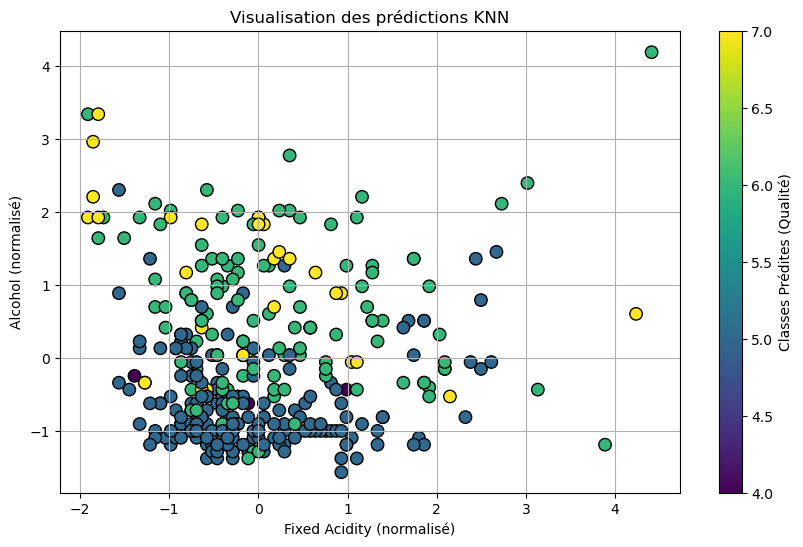

In [31]:
# -----------ALGO KNN----------
# utilisé pour classifier des points en se basant sur les classes ou valeurs de ses voisins les plus proches

# Choix des caractéristiques et de la cible
X = data_wine[['fixed acidity', 'alcohol']].values  # Variables prédictives
y = data_wine['quality'].values  # Variable cible (qualité du vin)

# Diviser les données en ensembles d'entraînement (train) et de test (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalisation des données avec StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialisation du modèle KNN avec k voisins
k = 4  # Nombre de voisins
knn = KNeighborsClassifier(n_neighbors=k)

# Entraînement du modèle sur les données d'entraînement
knn.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = knn.predict(X_test)

# Évaluation du modèle
print("\nRapport de classification :")
print(classification_report(y_test, y_pred, zero_division=0))  # Gestion des classes non prédictes

# Calcul de la précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision globale du modèle : {accuracy:.2f}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=80)
plt.title("Visualisation des prédictions KNN")
plt.xlabel("Fixed Acidity (normalisé)")
plt.ylabel("Alcohol (normalisé)")
plt.colorbar(label="Classes prédites (Qualité)")
plt.grid()
plt.show()